# Plots y visualización de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
%matplotlib inline

# Guardar la imagen del gráfico
# savefig("path_save.jpeg")

## Scatter Plot o Gráfico de Dispersión
Se usan para averiguar la intensidad de la relación entre dos variables numéricas.
El eje X representa la variable independiente, mientras que el eje Y representa la variable dependiente.

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

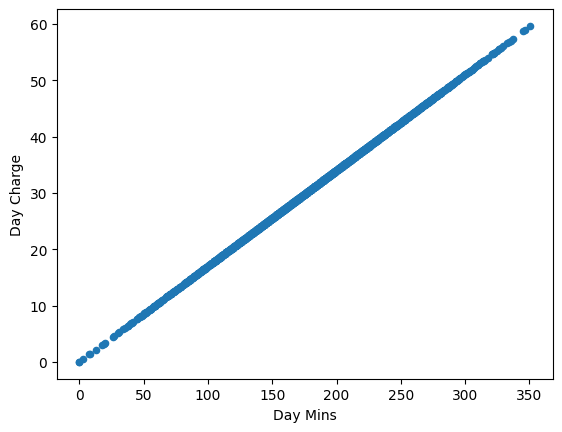

In [6]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

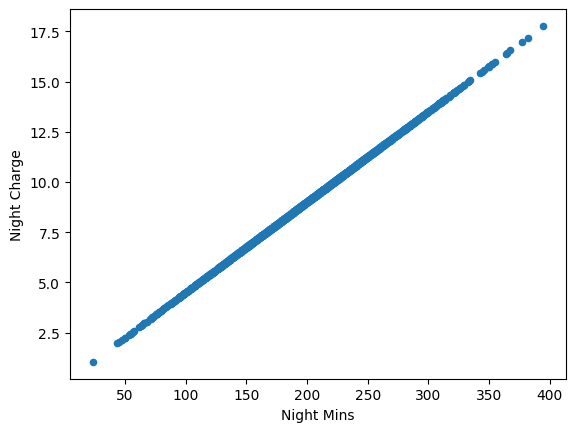

In [7]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

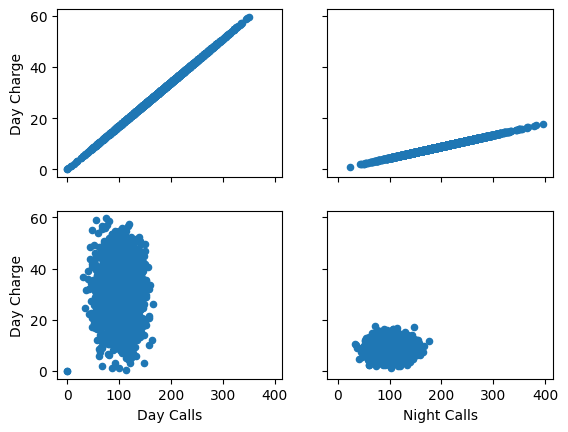

In [8]:
# Paneles de multiples plots
figure, axs = plt.subplots(2, 2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

## Histogramas de frecuencias
Es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua.

Text(0.5, 1.0, 'Histogramas del número de llamadas al día')

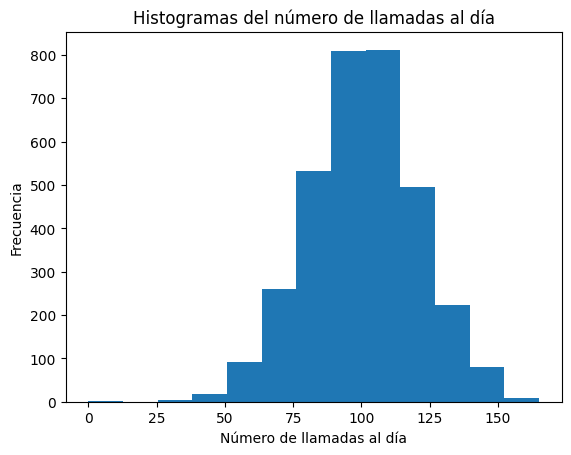

In [9]:
# Regla de sturges: saber cuantas divisiones realizar  //  k = 1 + log2 (N)
k = int(np.ceil(1+np.log2(3333)))  # ceil: redondeo hacia arriba
plt.hist(data["Day Calls"], bins=k) # bins=rangos
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histogramas del número de llamadas al día")

## Boxplot o Diagrama de caja y bigotes
Un diagrama de caja es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos.

* Caja: representa los quantiles, donde se encuentra la gran mayoría de los datos.
* Línea roja: representa la mediana (valor central).
* Linea amarilla: representa la moda.


Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

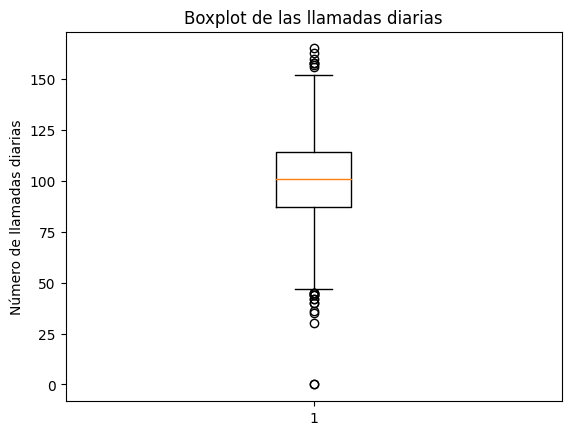

In [10]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [11]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [12]:
# Rango intercuartilico
iqr = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
iqr

27.0

In [13]:
# Bigote inferior
data["Day Calls"].quantile(0.25) - 1.5*iqr

46.5

In [14]:
# Bigote superior
data["Day Calls"].quantile(0.75) + 1.5*iqr

154.5